In [26]:
import numpy as np
import healpy as hp
import pickle
import matplotlib.pyplot as plt
from pixell import enmap, enplot

# Definitions (modify only the cell below)

In [10]:
output_dir = 'outputs'
nside = 32
ellmax = 50
pol = False

# Passbands

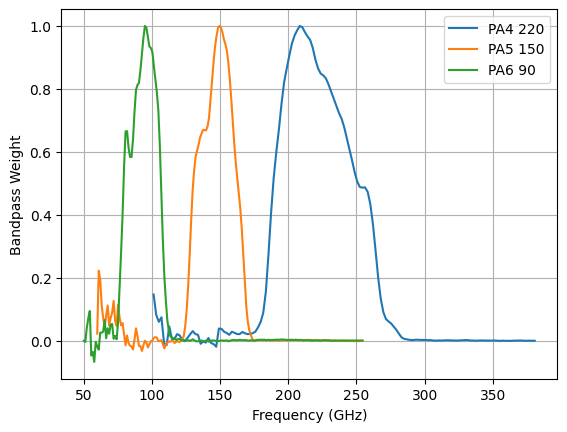

In [6]:
all_bandpass_freqs = pickle.load(open(f'{output_dir}/all_bandpass_freqs.p', 'rb'))
all_bandpass_weights = pickle.load(open(f'{output_dir}/all_bandpass_weights.p', 'rb'))

for i, central_freq in enumerate([220, 150, 90]):
    bandpass_freqs, bandpass_weights = all_bandpass_freqs[i], all_bandpass_weights[i]
    if central_freq == 220:
        band_name = 'PA4 220'
    elif central_freq == 150:
        band_name = 'PA5 150'
    elif central_freq == 90:
        band_name = 'PA6 90'
    plt.plot(bandpass_freqs, bandpass_weights/np.amax(bandpass_weights), label=band_name)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Bandpass Weight')
plt.grid()
plt.legend()

# Galactic and Extragalactic Component Maps

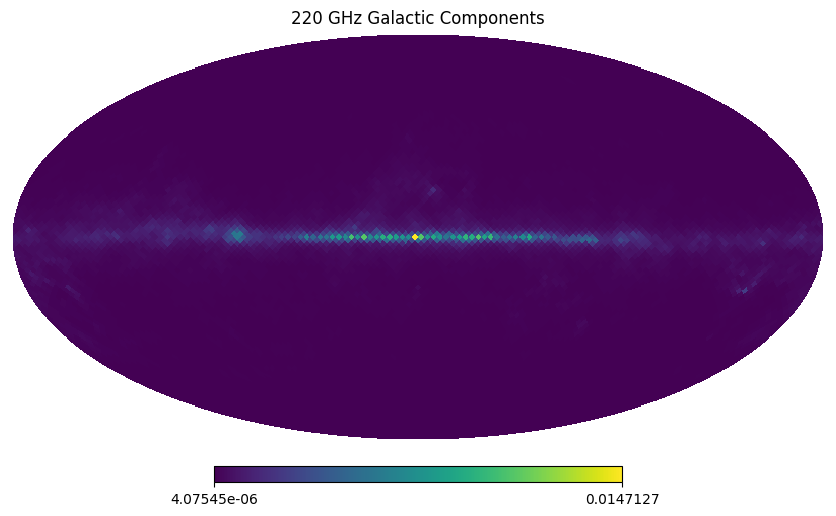

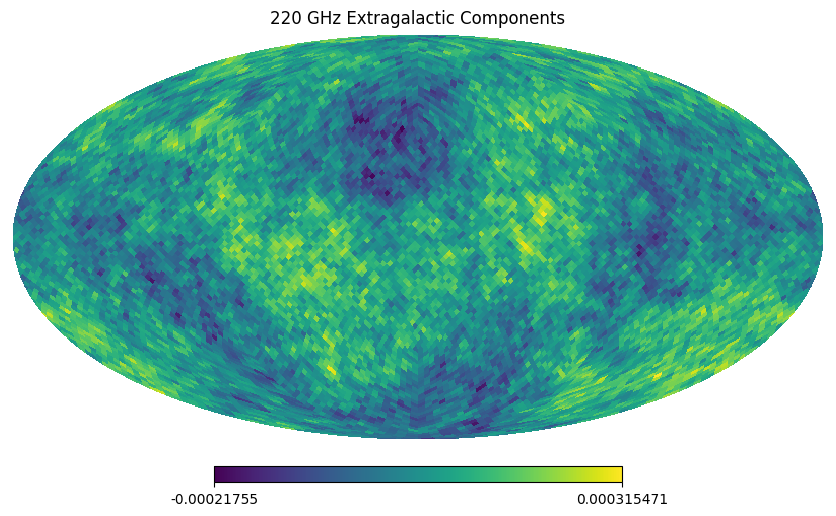

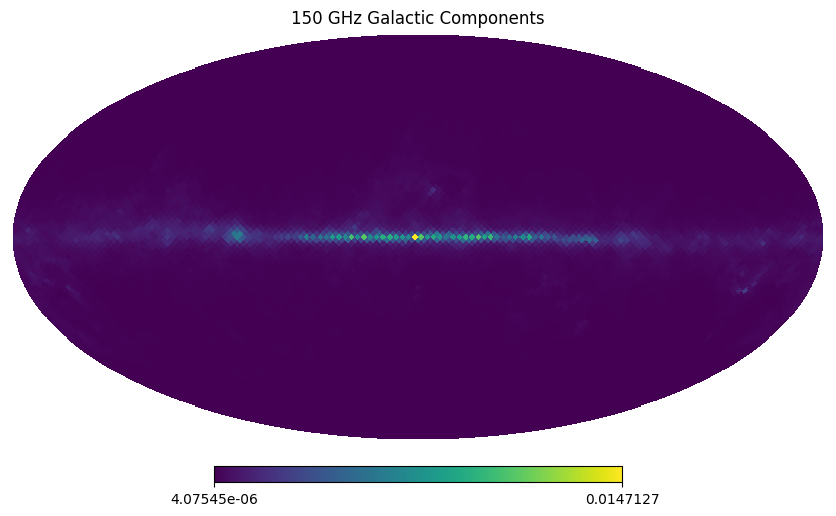

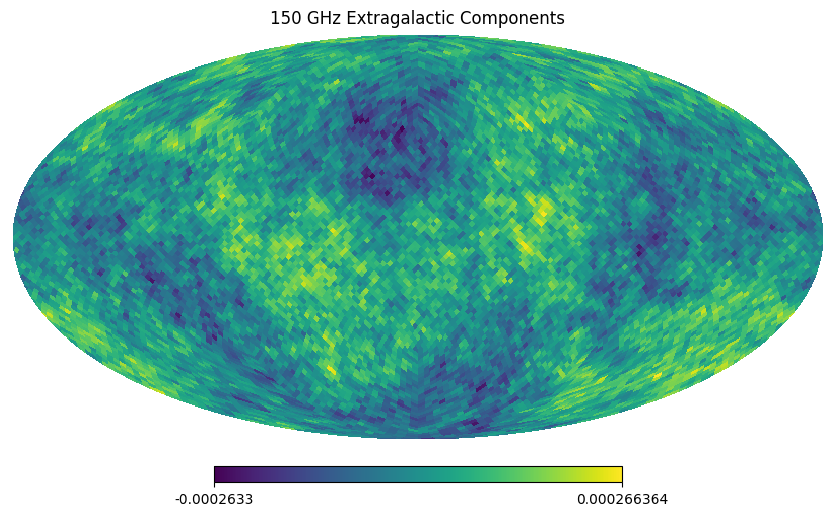

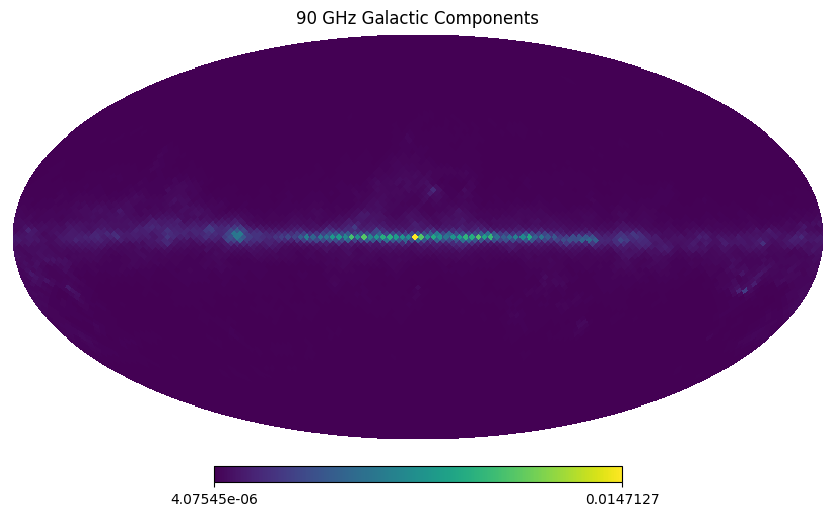

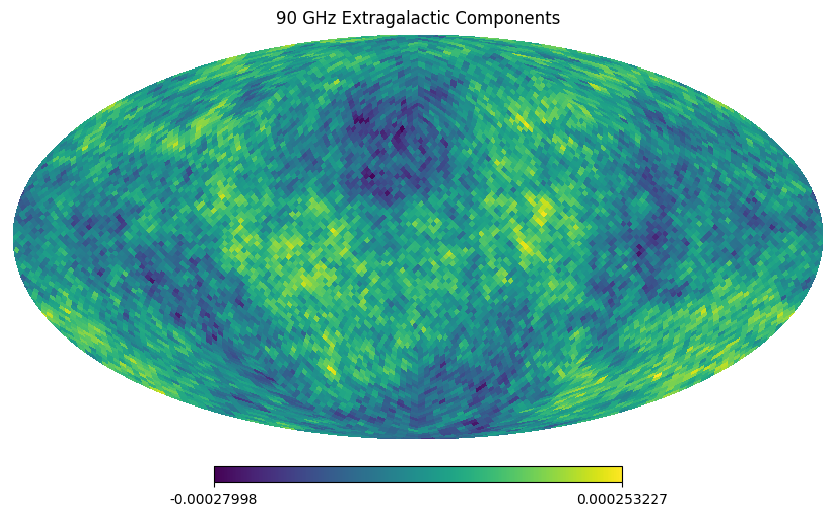

In [13]:
all_maps = pickle.load(open(f'{output_dir}/gal_and_extragal_before_beam.p', 'rb'))
freqs = [220, 150, 90]
map_types = ['I', 'Q', 'U']
comp_types = ['Galactic Components', 'Extragalactic Components']
for freq in range(3):
    for c, comp_type in enumerate(comp_types):
        if not pol:
            hp.mollview(all_maps[freq,c], title=f'{freqs[freq]} GHz {comp_type}')
        else:
            for map_type in range(3):
                hp.mollview(all_maps[freq,c,map_type], title=f'{freqs[freq]} GHz {map_types[map_type]} {comp_type} Map')
                
            

# Frequency Maps and Power Spectra without Beam

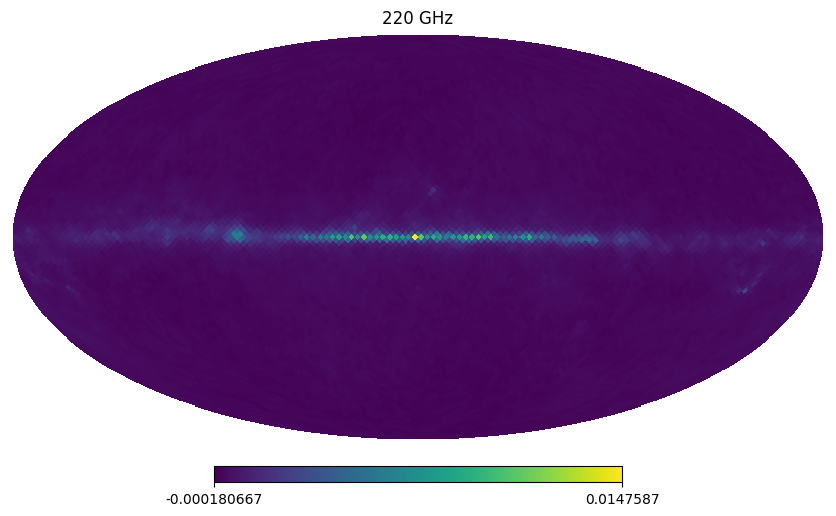

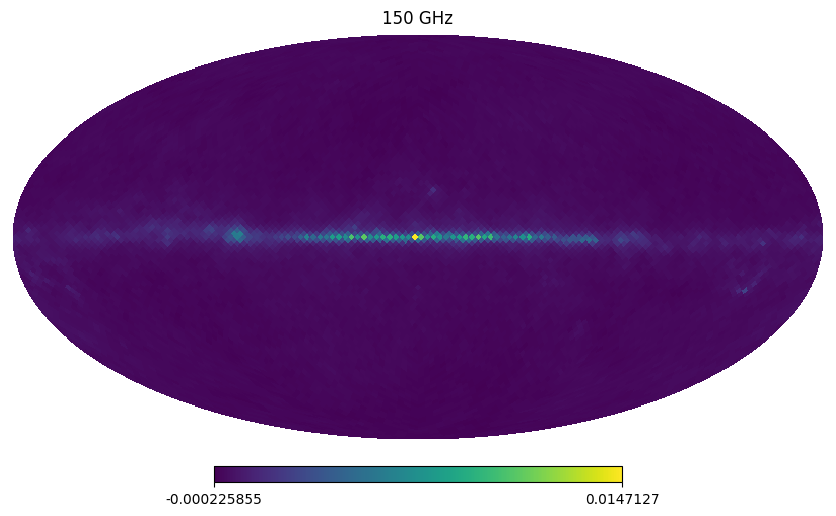

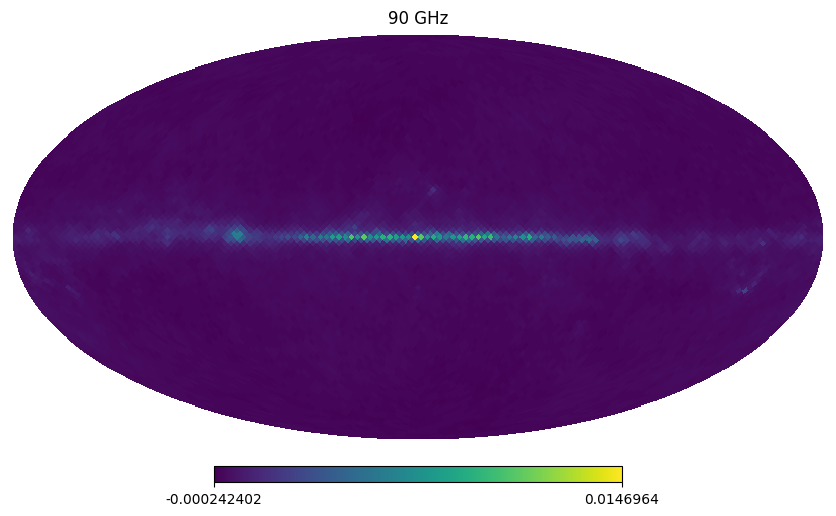

In [18]:
freq_maps = np.sum(all_maps, axis=1)
for freq in range(3):
    if not pol:
        hp.mollview(freq_maps[freq], title=f'{freqs[freq]} GHz')
    else:
        for map_type in range(3):
            hp.mollview(freq_maps[freq,map_type], title=f'{freqs[freq]} GHz {map_types[map_type]} Map')


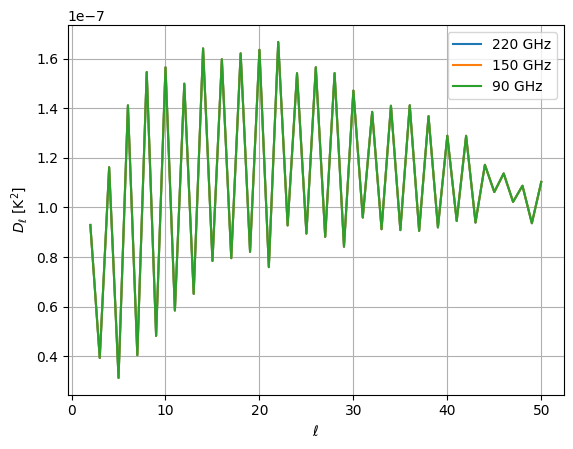

In [19]:
ells = np.arange(ellmax+1)
to_dl = ells*(ells+1)/2/np.pi
for freq in range(3):
    if not pol:
        plt.plot(ells[2:], (to_dl*hp.anafast(freq_maps[freq], lmax=ellmax))[2:], label=f'{freqs[freq]} GHz')
    else:
        for map_type in range(3):
            plt.plot(ells[2:], (to_dl*hp.anafast(freq_maps[freq, map_type], lmax=ellmax))[2:], label=f'{freqs[freq]} GHz {map_types[map_type]} Map')
            
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
plt.grid()
plt.legend()
plt.show()


# Frequency Maps and Power Spectrum with Beam

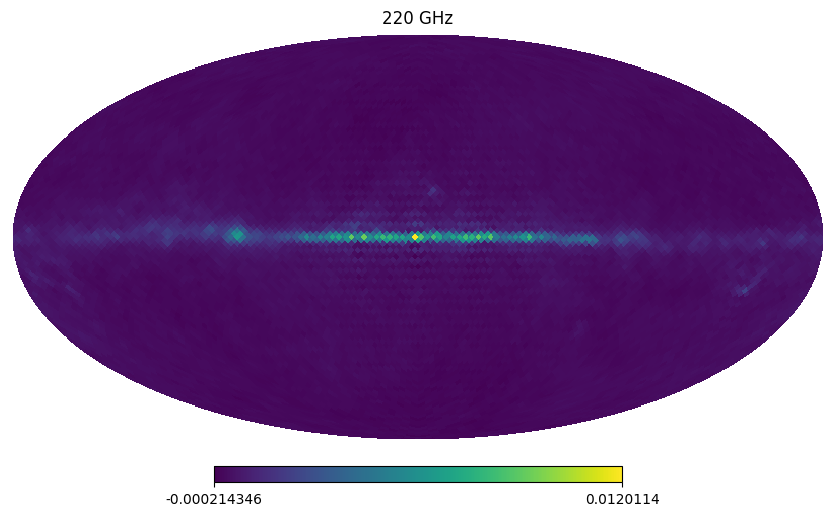

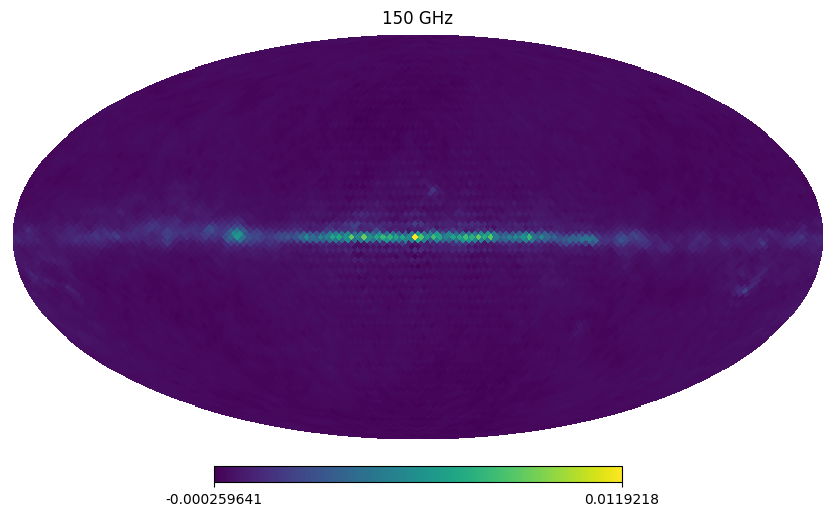

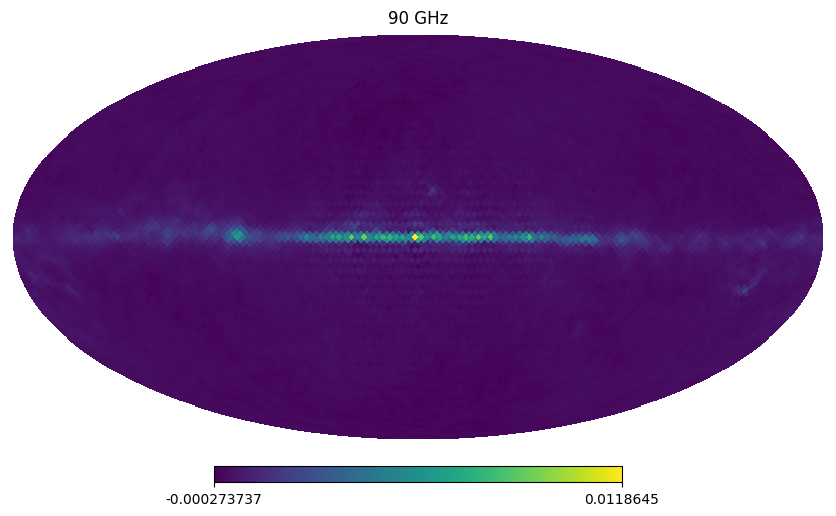

In [22]:
beam_convolved_maps = pickle.load(open(f'{output_dir}/beam_convolved_maps.p', 'rb'))
for freq in range(3):
    if not pol:
        hp.mollview(beam_convolved_maps[freq], title=f'{freqs[freq]} GHz')
    else:
        for map_type in range(3):
            hp.mollview(beam_convolved_maps[freq,map_type], title=f'{freqs[freq]} GHz {map_types[map_type]} Map')

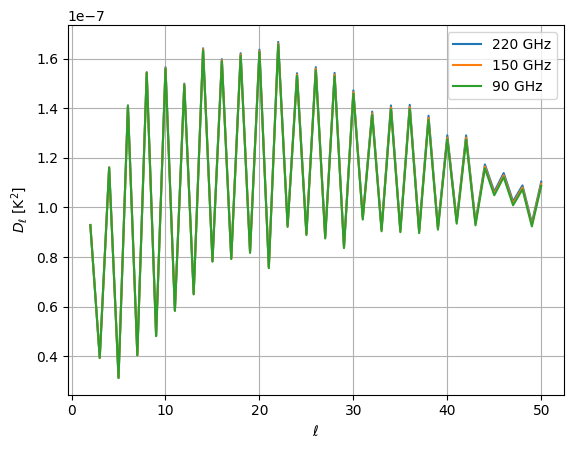

In [23]:
for freq in range(3):
    if not pol:
        plt.plot(ells[2:], (to_dl*hp.anafast(beam_convolved_maps[freq], lmax=ellmax))[2:], label=f'{freqs[freq]} GHz')
    else:
        for map_type in range(3):
            plt.plot(ells[2:], (to_dl*hp.anafast(beam_convolved_maps[freq, map_type], lmax=ellmax))[2:], label=f'{freqs[freq]} GHz {map_types[map_type]} Map')
            
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$ [$\mathrm{K}^2$]')
plt.grid()
plt.legend()
plt.show()


# Final CAR Maps

In [24]:
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs))

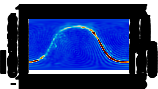

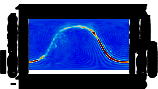

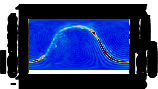

In [32]:
for i, freq in enumerate([220, 150, 90]):
    map_ = enmap.read_map(f'sim_{freq}GHz')
    eshow(map_)